Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

## INFORMATION ABOUT DATASET 
The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

Exog_Campaign_eng: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

### Calling Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

### Loading Dataset

In [2]:
df = pd.read_csv("train_1.csv")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


### Plotting Null Values 

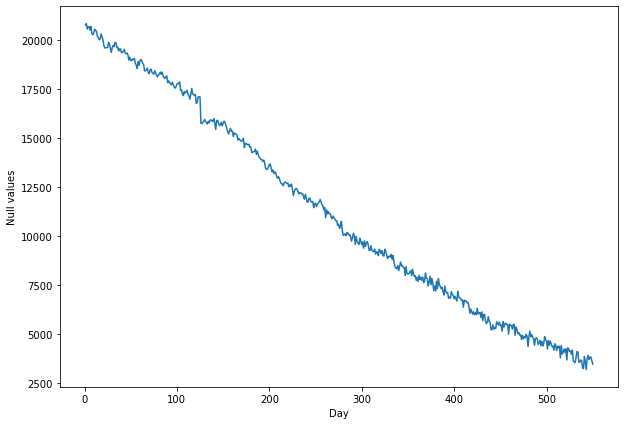

In [3]:
days = [r for r in range(1, len(df.columns))]
plt.figure(figsize=(10,7))
plt.xlabel('Day')
plt.ylabel('Null values')
plt.plot(days, df.isnull().sum()[1:])

#### From above graphs we can see that count of null values is decreasing as number of days increases which means that those values are null because they were not present on those days

In [4]:
print(df.shape)
df=df.dropna(how='all')

print(df.shape)

df=df.dropna(thresh=300)
print(df.shape)

(145063, 551)
(145063, 551)
(133617, 551)


1. We try droping the rows that have all values as nan, none in our case.

2. We then also drop rows that have nan more than 300 days, because the time series for that would not make much sense

3. We fill all the remaining values with zero assuming there was no traffic on the date that the values are nan for.

### Handling Missing Values

In [5]:
df=df.fillna(0)
df.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
145015,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0
145016,Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


#### Filtering Language from Page column to understand more about web page

In [6]:
df['Page'] = df['Page'].str.split('.wikipedia.org', expand=True).get(0).str[-2:]
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,zh,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


#### Aggregating values based on Page langugae and then taking transpose of it 

In [7]:
final_df = df.groupby('Page').mean().transpose().reset_index()
final_df.rename(columns={'index': 'language'},inplace = True)
final_df

Page,language,de,en,er,es,fr,ja,ru,ts,zh
0,2015-07-01,763.765926,3767.328604,11.198689,1127.485204,499.092872,614.637160,663.199229,131.962043,272.498521
1,2015-07-02,753.362861,3755.158765,17.734892,1077.485425,502.297852,705.813216,674.677015,136.379028,272.906778
2,2015-07-03,723.074415,3565.225696,17.417617,990.895949,483.007553,637.451671,625.329783,128.704533,271.097167
3,2015-07-04,663.537323,3711.782932,15.051026,930.303151,516.275785,800.897435,588.171829,109.781631,273.712379
4,2015-07-05,771.358657,3833.433025,22.154504,1011.759575,506.871666,768.352319,626.385354,119.915256,291.977713
...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,1119.596936,6314.335275,28.697263,1070.923400,840.590217,808.541436,998.374071,195.686874,363.066991
546,2016-12-28,1062.284069,6108.874144,24.625998,1108.996753,783.585379,807.430163,945.054730,227.715183,369.049701
547,2016-12-29,1033.939062,6518.058525,26.764253,1058.660320,763.209169,883.752786,909.352207,190.503550,340.526330
548,2016-12-30,981.786430,5401.792360,29.752281,807.551177,710.502773,979.278777,815.475123,196.377754,342.745316


#### Extracting Time series data for only en column for further analysis

In [8]:
df = final_df[['language','en']]
df

Page,language,en
0,2015-07-01,3767.328604
1,2015-07-02,3755.158765
2,2015-07-03,3565.225696
3,2015-07-04,3711.782932
4,2015-07-05,3833.433025
...,...,...
545,2016-12-27,6314.335275
546,2016-12-28,6108.874144
547,2016-12-29,6518.058525
548,2016-12-30,5401.792360


In [9]:
time_df = df.set_index('language')

#### Plotting our Time series data 

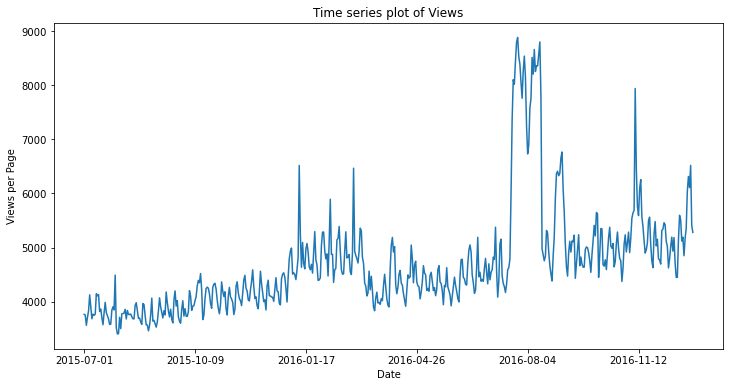

In [10]:
time_df['en'].plot(figsize=(12, 6))

# Optionally, add labels, titles, or other plot customization
plt.xlabel('Date')
plt.ylabel('Views per Page')
plt.title('Time series plot of Views')

plt.show()

In [11]:
time_df = df.set_index('language')

#### Breaking data into Train and Test data

In [12]:
train_x = time_df[:-20]
test_x = time_df[-20:]


In [13]:
print(train_x.shape)
print(test_x.shape)

(530, 1)
(20, 1)


#### Plotting Test and Train data for better visualization

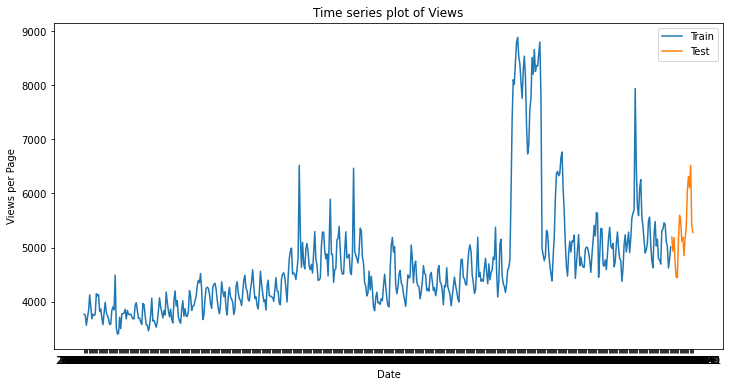

In [14]:
plt.figure(figsize=(12, 6)) 

plt.plot(train_x, label="Train")
plt.plot(test_x, label="Test")
plt.legend() 

plt.xlabel('Date')
plt.ylabel('Views per Page')
plt.title('Time series plot of Views')

plt.show() 

In [15]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape

def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted),3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MSE :', round(mse(actual, predicted), 3))
    print('MAPE:', round(mape(actual, predicted), 3))

#### Naive Method prediction using last value as Prediction

MAE : 479.595
RMSE : 633.842
MSE : 401756.117
MAPE: 0.086


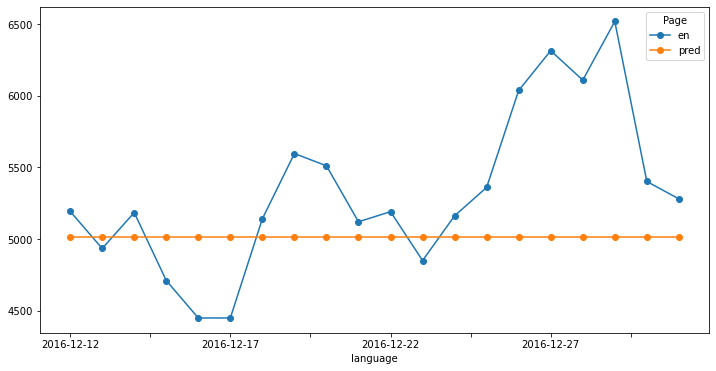

In [16]:
# naive method>> last value
test_x['pred'] = train_x['en'][-1]

test_x.plot(style='-o', figsize=(12, 6))
performance(test_x['en'], test_x['pred'])

#### prediction using mean of value as Prediction

MAE : 698.161
RMSE : 855.261
MSE : 731471.683
MAPE: 0.124


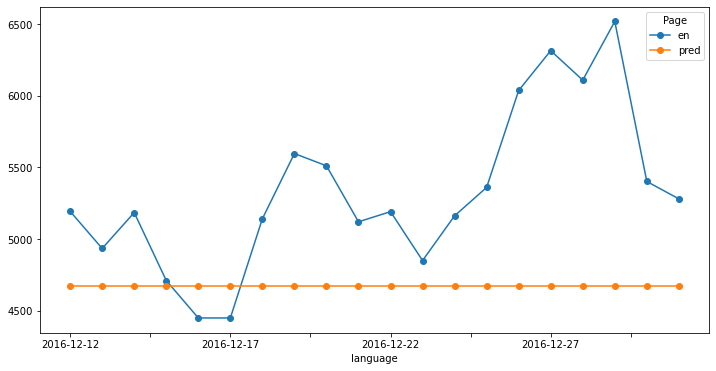

In [17]:
test_x['pred'] = train_x['en'].mean()

test_x.plot(style='-o', figsize=(12, 6))
performance(test_x['en'], test_x['pred'])

#### prediction using value from same month same week but from last year as prediction

MAE : 1153.785
RMSE : 1273.213
MSE : 1621070.781
MAPE: 0.209


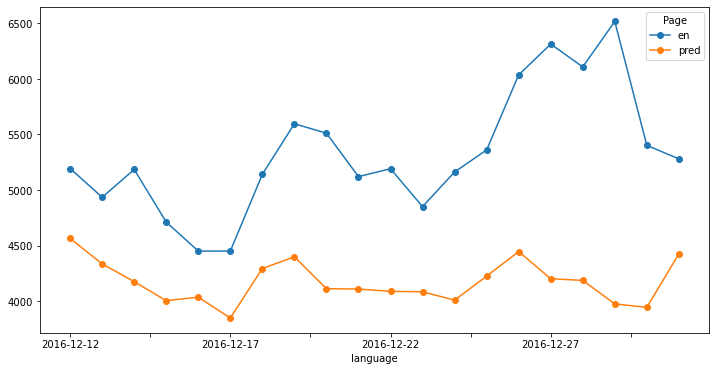

In [18]:
train_x.index = pd.to_datetime(train_x.index)
test_x['pred'] = None

for i in test_x.index:
    current_date = i
    
    current_date = pd.to_datetime(current_date)
    one_year_ago_same_day_week = train_x[(train_x.index.year == current_date.year - 1) &
                                         (train_x.index.week == current_date.week) &
                                         (train_x.index.dayofweek == current_date.dayofweek)]

    if not one_year_ago_same_day_week.empty:
        test_x.at[i, 'pred'] = one_year_ago_same_day_week['en'].iloc[0]
    else:
        # If no matching value in the previous year, try the same week of the previous month
        one_year_ago_same_week = train_x[(train_x.index.year == current_date.year - 1) &
                                       (train_x.index.month == current_date.month) &
                                       (train_x.index.week == current_date.week) &
                                       (train_x.index.dayofweek == current_date.dayofweek)]

        if not one_year_ago_same_week.empty:
            test_x.at[i, 'pred'] = one_year_ago_same_week['en'].iloc[0]

test_x.plot(style='-o', figsize=(12, 6))

# Assuming you have a 'performance' function defined
performance(test_x['en'], test_x['pred'])

#### prediction by adding trend to updated value as prediction

MAE : 461.689
RMSE : 614.552
MSE : 377674.45
MAPE: 0.082


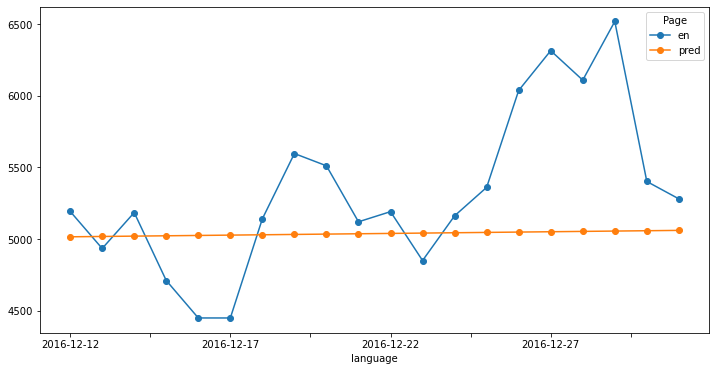

In [19]:
# Drift Method
y_t = train_x['en'][-1]
y_0 = train_x['en'][0]

m = (y_t - y_0) / (len(train_x['en'])-1) # slope
h = np.arange(1, len(test_x) + 1)

test_x['pred'] = y_t + m * h

test_x.plot(style='-o', figsize=(12, 6))

performance(test_x['en'], test_x['pred'])

#### Simple Exponential Smoothening 

MAE : 556.851
RMSE : 635.514
MSE : 403877.444
MAPE: 0.109


C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


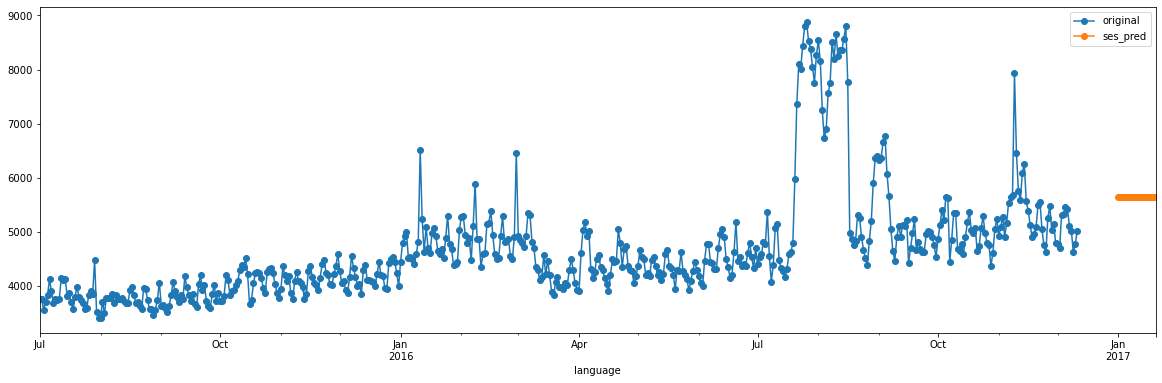

In [20]:
import statsmodels.api as sm

model = sm.tsa.SimpleExpSmoothing(time_df.en).fit(smoothing_level=0.2)
pred = model.forecast(20)

plt.figure(figsize = (20,6))
train_x.en.plot(label='original', style='-o')
#test_x.en.plot(label='test', style='-o')
pred.plot(label='ses_pred', style='-o')
performance(test_x['en'], pred)
plt.legend()

#### Double exponential smoothening with Additive trend 

MAE : 573.631
RMSE : 646.556
MSE : 418034.986
MAPE: 0.112
----DES---
 None


C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


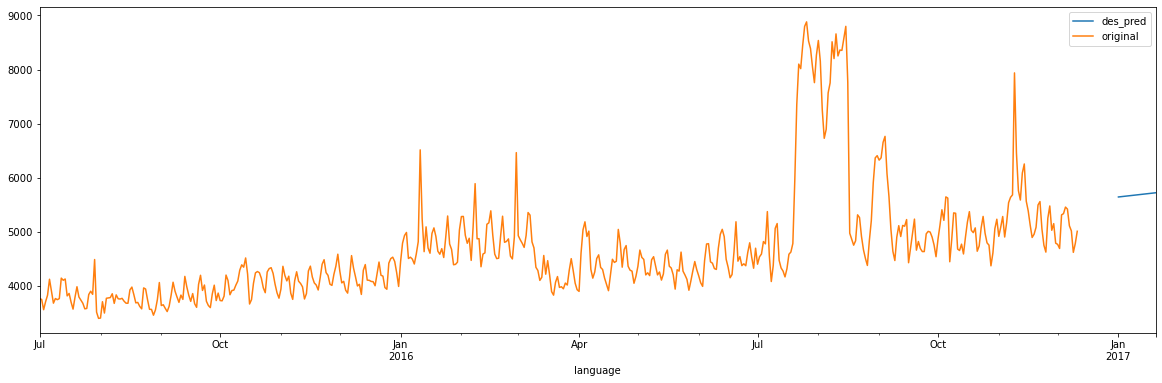

In [21]:
model_des = sm.tsa.ExponentialSmoothing(time_df.en, trend='add').fit(smoothing_level=0.4, smoothing_trend=0.01)
#model_des.fittedvalues.plot(label='fitted_des')

plt.figure(figsize = (20,6))
pred_des = model_des.forecast(20)
pred_des.plot(label='des_pred', style='')
print("----DES---\n", performance(test_x['en'], pred_des))

train_x.en.plot(label='original')
plt.legend()

#### Double exponential smoothening with Multiplicative trend

MAE : 450.502
RMSE : 532.356
MSE : 283402.813
MAPE: 0.086
----DES---
 None


C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


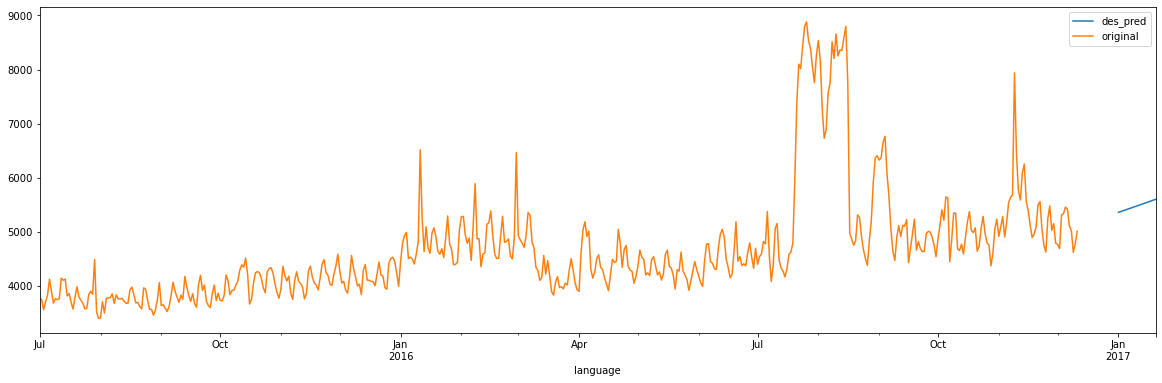

In [22]:
model_des = sm.tsa.ExponentialSmoothing(time_df.en, trend='multiplicative').fit(smoothing_level=0.8, smoothing_trend=0.01)
#model_des.fittedvalues.plot(label='fitted_des')

plt.figure(figsize = (20,6))
pred_des = model_des.forecast(20)
pred_des.plot(label='des_pred', style='')
print("----DES---\n", performance(test_x['en'], pred_des))

train_x.en.plot(label='original')
plt.legend()

#### Triple Exponential smoothening with additive trend 

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 573.631
RMSE : 646.556
MSE : 418034.986
MAPE: 0.112
----TES---
 None


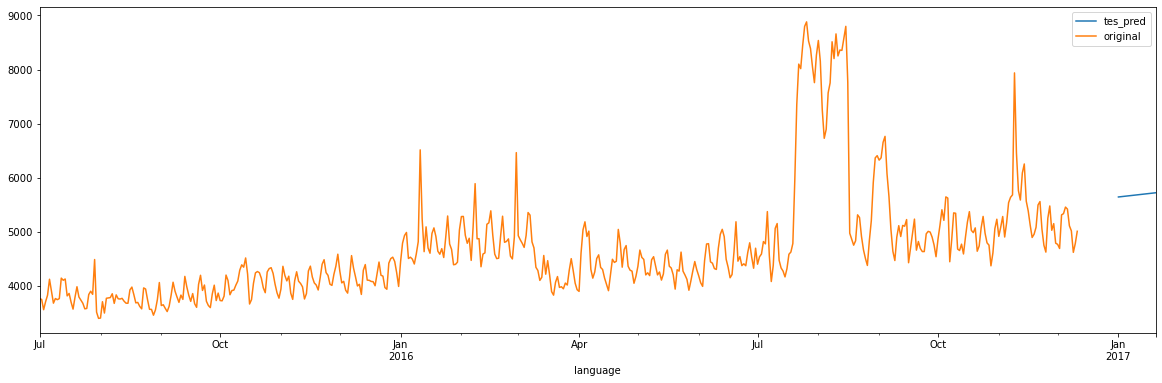

In [23]:
model_tes = sm.tsa.ExponentialSmoothing(time_df.en, trend='add', seasonal=None).fit(
    smoothing_level=0.4, smoothing_trend=0.01, smoothing_seasonal=0.005)
#model_tes.fittedvalues.plot(label='fitted_tes')

plt.figure(figsize = (20,6))
pred_tes = model_tes.forecast(20)
pred_tes.plot(label='tes_pred', style='')
print("----TES---\n", performance(test_x['en'], pred_tes))

train_x.en.plot(label='original')
plt.legend()

#### Triple exponential smoothening with Multiplicative trend

MAE : 450.502
RMSE : 532.356
MSE : 283402.813
MAPE: 0.086
----TES---
 None


C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


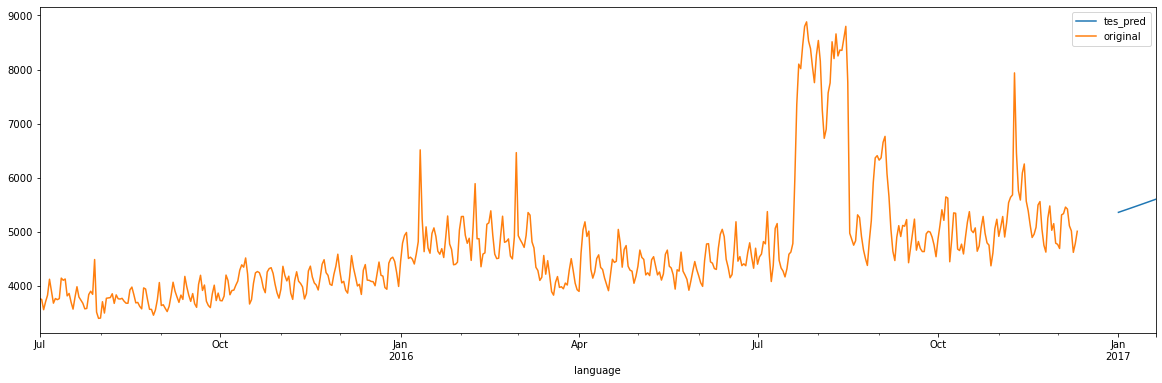

In [24]:
model_tes = sm.tsa.ExponentialSmoothing(time_df.en, trend='multiplicative', seasonal=None).fit(
    smoothing_level=0.8, smoothing_trend=0.01, smoothing_seasonal=0.004)
#model_tes.fittedvalues.plot(label='fitted_tes')

plt.figure(figsize = (20,6))
pred_tes = model_tes.forecast(20)
pred_tes.plot(label='tes_pred', style='')
print("----TES---\n", performance(test_x['en'], pred_tes))

train_x.en.plot(label='original')
plt.legend()

In [25]:
print(time_df.shape)
print(train_x.shape)
print(test_x.shape)

(550, 1)
(530, 1)
(20, 2)


### Testing that our data is Stationary or Not?

ADF Statistic: -2.37356297456994
p-value: 0.14933749437355337
The time series is non-stationary (fail to reject the null hypothesis).


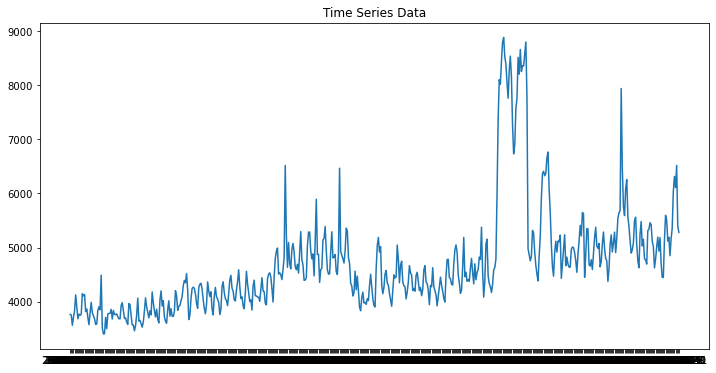

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_df['en'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Check for stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is non-stationary (fail to reject the null hypothesis).')

plt.figure(figsize=(12, 6))
plt.plot(time_df['en'])
plt.title('Time Series Data')
plt.show()

# Remove trend and seasonality with differencing

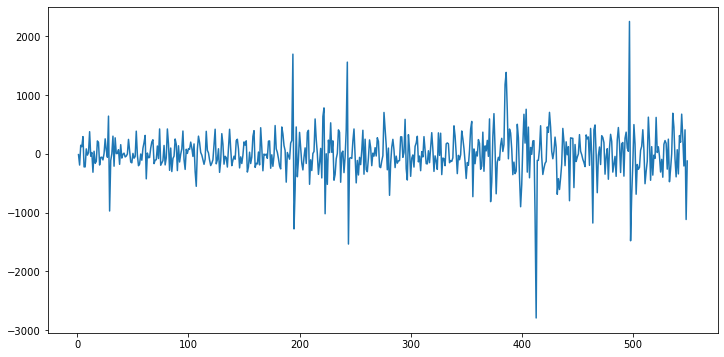

In [27]:
ts_diff = time_df - time_df.shift(1)

plt.figure(figsize=(12, 6))
plt.plot(ts_diff.values)
plt.show()

### Testing that our data is Stationary or Not?

ADF Statistic: -8.273590058493808
p-value: 4.721271966433901e-13
The time series is stationary (reject the null hypothesis).


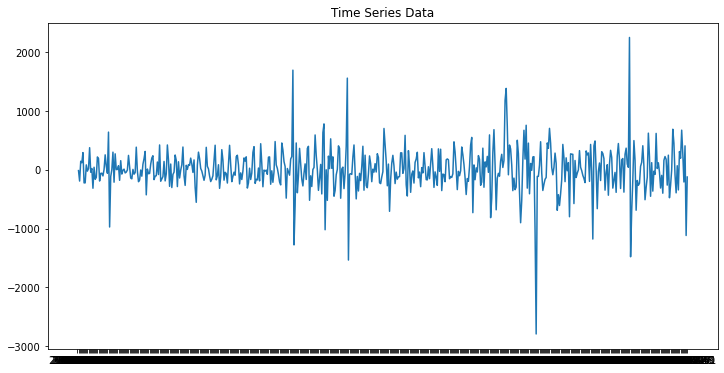

In [28]:
exog_variable = ts_diff['en']

# Check for missing values (NaN)
if exog_variable.isnull().any():
    # Handle missing values by either dropping rows or filling them
    exog_variable = exog_variable.dropna()  # Drop rows with NaN values
    # Alternatively, you can fill missing values with a specific value:
    # exog_variable.fillna(value, inplace=True)

# Now you can proceed with the Augmented Dickey-Fuller test using the cleaned exogenous variable.
result = adfuller(exog_variable)
# The rest of your code for the ADF test...

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Check for stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is non-stationary (fail to reject the null hypothesis).')

plt.figure(figsize=(12, 6))
plt.plot(ts_diff['en'])
plt.title('Time Series Data')
plt.show()

#### Plotting Auto correlation and Partial correlation for understaing Seasonality pattern for our data

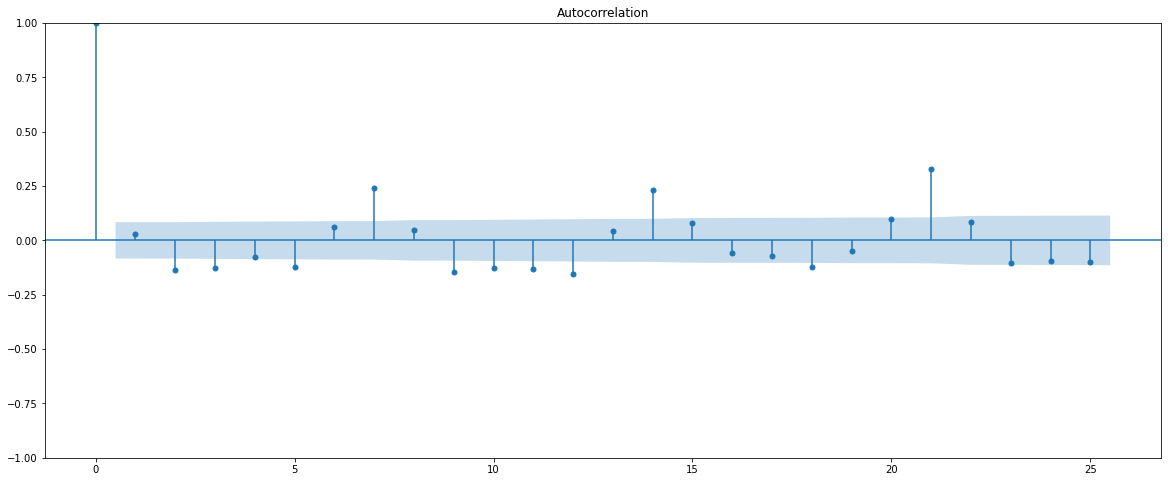

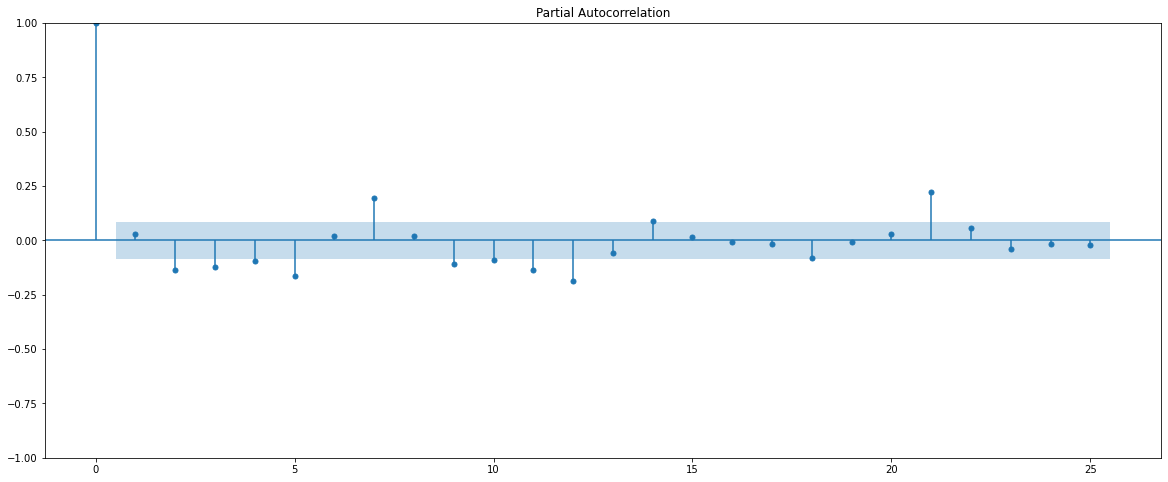

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create a figure for ACF
fig, ax = plt.subplots(figsize=(20, 8))
acf = plot_acf(exog_variable, lags=25, ax=ax)

# Create a figure for PACF
fig, ax = plt.subplots(figsize=(20, 8))
pacf = plot_pacf(exog_variable, lags=25, ax=ax)

# Display the enlarged plots
plt.show()

### From above graph we can observe that seasonility is 7 periods

#### ARIMA 

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import DataFrame

model = SARIMAX(ts_diff, order=(1,1,1))
model_fit = model.fit(disp=0)

model_fit.predict(12)

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2015-07-13    45.737502
2015-07-14    25.781847
2015-07-15    27.549862
2015-07-16    -6.816291
2015-07-17     7.706138
                ...    
2016-12-27    25.101633
2016-12-28    13.168888
2016-12-29    -2.246466
2016-12-30    17.615124
2016-12-31   -31.880459
Freq: D, Name: predicted_mean, Length: 538, dtype: float64

#### Breaking data into train and test

In [31]:
train = ts_diff[:-20]
test = ts_diff[-20:]

In [32]:
print(train.shape)
print(test.shape)

(530, 1)
(20, 1)


#### Plotting our whole data along with test data and our prediction 

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


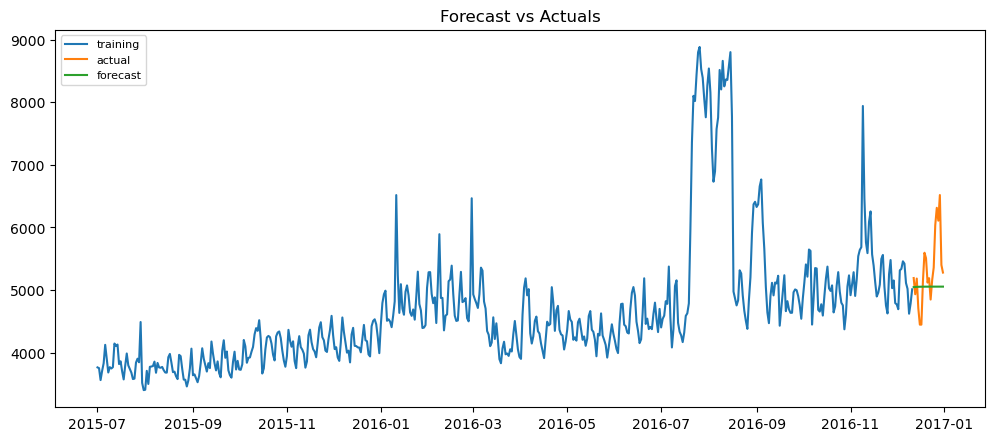

In [38]:
model = SARIMAX(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc = fitted.forecast(20, alpha=0.02)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [39]:
performance(test, fc_series)

MAE : 458.378
RMSE : 613.837
MSE : 376795.414
MAPE: 0.082


#### From above graph we can see that Green line which is our prediction is not giving very good result when compared to our test data (Orange Line)  and error is 8.2%

#### Adding ex_df, This file contains data for the dates which had a campaign or significant event that could affect the views for that day.

In [34]:
ex_df = pd.read_csv('xog_Campaign_eng.csv')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [35]:
exog=ex_df['Exog'].to_numpy()

#### Again plotting our test, train and prediction after ex_df data to existing time series data

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


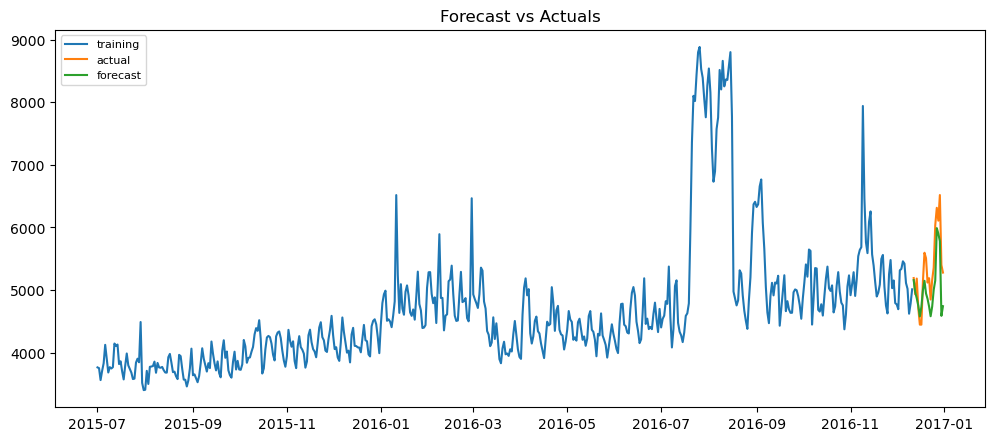

In [40]:
import statsmodels.api as sm
train=time_df[:530]
test=time_df[530:]
model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,7),exog=exog[:530])
results=model.fit()

fc=results.forecast(20,dynamic=True,exog=pd.DataFrame(exog[530:]))

# Make as pandas series
fc_series_1 = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series_1, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [41]:
performance(test, fc_series_1)

MAE : 362.085
RMSE : 436.114
MSE : 190195.398
MAPE: 0.066


#### From above graph we can see that after adding ex_df data our prediction values are very close to Test values and error now is 6.6% 